<a href="https://colab.research.google.com/github/karlmanalo/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


### Confidence Intervals:
### 1. Generate and numerically represent a confidence interval

In [0]:
import numpy as np
import pandas as pd
from scipy import stats

In [183]:
coinflips = np.random.binomial(1, p=.5, size=40)
coinflips.mean()

0.475

In [0]:
def confidence_interval(data, confidence=.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2, n - 1)
  moe = t*stderr
  return (mean, mean - moe, mean + moe)

In [185]:
confidence_interval(coinflips)

(0.475, 0.3132576770715137, 0.6367423229284863)

In [186]:
.525 - .3633

0.1617

0..525 $\pm$ 0.1617

### 2. Graphically (with a plot) represent the confidence interval


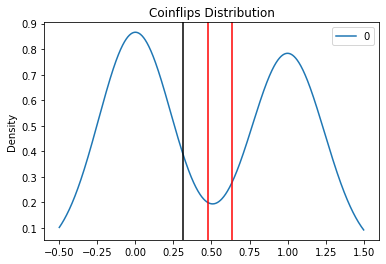

In [187]:
import matplotlib.pyplot as plt

CI = confidence_interval(coinflips)
df_coinflips = pd.DataFrame(coinflips)

df_coinflips.plot.density()
plt.title("Coinflips Distribution")
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red')
plt.show()



###  3. Interpret the confidence interval - what does it tell you about the data and its distribution?



This confidence interval tells tells me that the probability that this coin will land heads-up is 0.525 $\pm$ 0.1617. The data falls within our null hypothesis: that this coin has a probability of landing heads-up of .5. The distribution of this data should be normal, but with such a small sample size (40), it is not obvious from this dataset. As the sample size increases, the normality of this dataset will become evident, and the confidence interval will shrink to give a more exact approximation of the dataset's mean.

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [189]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

print(df.shape)
df.head()

--2020-03-18 03:44:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.5’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-03-18 03:44:29 (286 KB/s) - ‘house-votes-84.data.5’ saved [18171/18171]

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [190]:
df = df.replace({'y':1, 'n':0, '?':np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [191]:
# Creating crosstab of 'party' vs 'education'

obs_freq = pd.crosstab(df['party'], df['education'], margins=True)

obs_freq

education,0.0,1.0,All
party,,,
democrat,213,36,249
republican,20,135,155
All,233,171,404


In [192]:
# Creating array of observed values

observed = pd.crosstab(df['party'], df['education'])

observed = observed.values

observed

array([[213,  36],
       [ 20, 135]])

In [193]:
# Creating array of row sums

row_sums = obs_freq.iloc[0:2, 2:].values

row_sums

array([[249],
       [155]])

In [194]:
# Transposing row sums

row_sums = row_sums.T[0]

row_sums

array([249, 155])

In [195]:
# Creating array of column sums

col_sums = obs_freq.iloc[2, 0:2]

col_sums.values

array([233, 171])

In [196]:
# Sample size omitting NaN values in column

samp_size_cleaned = df[~np.isnan(df['education'])].shape[0]

samp_size_cleaned

404

In [197]:
# Nested for loop to create array where each "point" in array equals column sum
# times row sum divided by the sample size. First for loop loops over row index,
# second for loop loops over each column in each respective row index.

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for col in col_sums:
    expected_val = col * row_sums[i] / samp_size_cleaned
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[143.60643564 105.39356436]
 [ 89.39356436  65.60643564]]


In [198]:
# Chi Square Calculation

chi2 = ((observed - expected)**2 / expected).sum()

chi2

206.49018306296443

###   - In a single line using Scipy

In [199]:
stats.chi2_contingency(observed)

print(chi2)

206.49018306296443


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)